In [83]:
import fompy.units
import numpy as np
from fompy.constants import *
from fompy.units import unit, from_unit
from fompy.models import *
from fompy.materials import Si

# 2019 год

## Задание 1
Рассчитайте плотность соединения ZnTe. Параметр решетки 6.1Å

In [84]:
m1 = 114.82 * amu
m2 = 121.76 * amu
m = (m1 + m2) /  2
a = 6.479 * angstrom
l = DiamondLikeLattice(a, m)

print(f'Density: {l.density} g / cm^3')
print(f'Concentration: {l.concentration} cm^-3')

Density: 5.779412745888399 g / cm^3
Concentration: 2.9414809978010444e+22 cm^-3


## Задание 2
$\text{Effective mass of density of states for electrons} = (vallues^2*{m_{l}*m_{t}^{2}})^{1/3}$\
$\text{Effective mass of density of states for holes} = (m_{hh}^{3/2} + m_{lh}^{3/2})^{2/3}$

Ea: 0.08043349078490213 eV
Ed: 1.0842517818733768 eV
Nc: 2.9478007828414684e+18
Nv: 9.948827642089957e+18
1.0601286697387697
0.10811756134033203
difference between the donor and acceptor Fermi potentials: 0.951970673198331
width of the depletion layer inside the n-type semiconductor: 5.137534511138914e-06 cm
width of the depletion layer inside the p-type semiconductor: 2.473881436228343e-05 cm
full depletion width: 2.987634887342235e-05 cm
js 1.3354599702017614e-16
1.9653473270854312e-08 9.560355725907644e-08
1.8891720904585713e-26 6.126536164314132e-27
1.0871599174638806
Max I 45.99139390333794 A


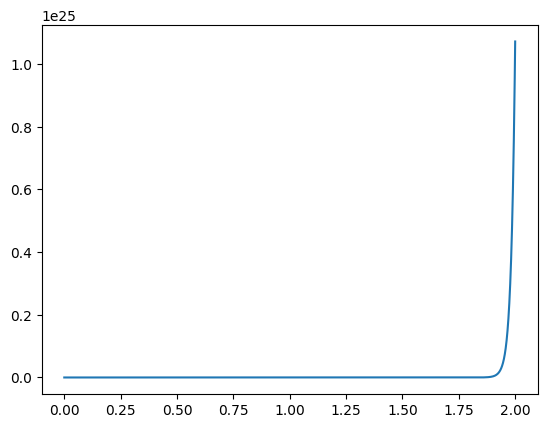

In [110]:
from matplotlib import pyplot as plt

T = 200
Na = 2e16
Nd = 1e17
# # для электронов mt=0,19; ml=0.98; 6 долин (Si)
# mc = (6 ** 2 * 0.19 ** 2 * 0.98) ** (1 / 3)
# # для дырок mhh = 0.49; mlh = 0.16
# mh = (0.49 ** (3 / 2) + 0.16 ** (3 / 2)) ** (2 / 3)
Ea = hydrogen_like_energy(11.7, m=0.81 * me)
Ed = Si.Eg - hydrogen_like_energy(11.7, m=0.36 * me)
print(f'Ea: {Ea / eV} eV')
print(f'Ed: {Ed / eV} eV')
print(f'Nc: {Si.Nc(T=T)}')
print(f'Nv: {Si.Nv(T=T)}')

pn = PNJunctionFullDepletion(Si, Na, Ea, Nd, Ed)
print(pn.n_mat.fermi_level(T=T) / eV)
print(pn.p_mat.fermi_level(T=T) / eV)

print(f'difference between the donor and acceptor Fermi potentials: {pn.delta_phi(T) / volt}')
print(f'width of the depletion layer inside the n-type semiconductor: {pn.w_n(T)} cm')
print(f'width of the depletion layer inside the p-type semiconductor: {pn.w_p(T)} cm')
print(f'full depletion width: {pn.w(T)} cm')

pn = PNJunctionNonDegenerate(Si, Na, Ea, Nd, Ed)
Lp = 2e-2
Ln = 9e-1
Dp = 12
Dn = 36
j0_n = pn.j0_n(Dn, Ln)
j0_p = pn.j0_p(Dp, Lp)
Js = ((j0_n + j0_p) * from_unit(1, 'mm^2')) / unit('A')
print('js', Js)
J = lambda V: Js * (np.exp(e * V / (k * T)) - 1)
v = np.linspace(0 * volt, 2 * volt, 1000)

j = np.vectorize(J)(v)
plt.plot(v / volt, j/ unit('A'))

ni2 = (sqrt(Si.Nc(T=T) * Si.Nv(T=T)) * exp(-Si.Eg / (2 * k * T))) ** 2

p_n = ni2 / (Si.Nc(T=T) * exp((pn.n_mat.fermi_level(T=T) - Si.Eg) / (k * T)))
n_p = ni2 / (Si.Nv(T=T) * exp(-pn.p_mat.fermi_level(T=T) / (k * T)))
print(p_n, n_p)
print(e * Dp / Lp * p_n * from_unit(1, 'mm2') / unit('A'), e * Dn / Ln * n_p * from_unit(1, 'mm2') / unit('A'))


# ток
def cur(V):
    return e * Dp / Lp * p_n * from_unit(1, 'mm2') * (exp(e * V / k / T) - 1)


# мощность
def pwr(V):
    return V * cur(V)


v_max = bisect(lambda x: pwr(x) - from_unit(50, 'W'), 0.01 * volt, 2 * volt, xtol=1e-15 * volt)
i_max = cur(v_max)
print(v_max / volt)
print(f"Max I {i_max / unit('A')} A")


## Задание 3
КДБ-5. Ищем ширину ОПЗ высоту барьера Шоттки

In [86]:
# КДБ-5
sem = DopedSemiconductor.from_materials(Si, from_unit(500, 'cm / V s'), 'P', from_unit(10, 'Ohm cm'))
print(f'Na: {sem.Na:e}, Es: {sem.Ea / eV}, Ef: {sem.fermi_level() / eV}')

ms = MSJunction(Metal(5.1 * eV), sem)
dphi = ms.delta_phi()
df = fompy.units.to_unit(dphi*e, 'eV')
print(df)
n = sem.n_concentration()
print(sem.n_concentration())
print(ms.contact_type())
print(f'Depletion zone width = %.8f cm' % (depletion_width(Si.eps, n, ms.delta_phi())))
electron_affinity = 4.05 * eV
Asi = 1.12*eV + electron_affinity - sem.fermi_level()
print(Asi/eV)
print(f'Schottky barrier = %1.2f eV' % (5.1 - Asi / eV))

Na: 0.000000e+00, Es: 0.0, Ef: 0.90649471282959
0.8364947128295898
1246568231481788.8
ContactType.INVERSION
Depletion zone width = 0.00009315 cm
4.2635052871704096
Schottky barrier = 0.84 eV
